# 001_EVI vs NDVI vs YIELD CORRELATION

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import scipy
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import statsmodels.formula.api as sm
import copy
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import sklearn
from math import sqrt
from functools import reduce
import numpy as np
#import ee
#import geemap
import geopandas as gpd
import rioxarray as rxr
import rasterstats as rs
from rasterio.plot import show
import rasterio

%matplotlib inline

In [4]:
eviPath = '/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/monthlyCompositeEVI_2017.tif'
evi = rxr.open_rasterio(eviPath)


points = gpd.read_file('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/intersect_DS_points.gpkg')
points

points = '/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/EVI_2017_intersected_monthly.gpkg'
points = gpd.read_file(points)
grouped = points.groupby(['Class','ADM3_EN']).mean().reset_index()
grouped

,Class,ADM3_EN,EVI2017_1,EVI2017_2,EVI2017_3,EVI2017_4,EVI2017_5,EVI2017_6,EVI2017_7,EVI2017_8,EVI2017_9,EVI2017_10,EVI2017_11,EVI2017_12
0,Irrigated Rice,Anilao,0.718600,0.453600,0.539100,0.488100,0.488500,0.335100,0.454500,0.689500,0.371800,0.283000,0.468000,0.663200
1,Irrigated Rice,Banate,0.457500,0.411567,0.408817,0.370450,0.424100,0.526467,0.593783,0.636183,0.475667,0.353433,0.526417,0.555783
2,Irrigated Rice,Barotac Nuevo,0.615091,0.506041,0.386814,0.399655,0.404409,0.448605,0.626618,0.654327,0.529750,0.320155,0.425114,0.601555
3,Irrigated Rice,Barotac Viejo,0.555367,0.461733,0.464138,0.461324,0.390210,0.469367,0.618424,0.589652,0.474343,0.460624,0.610605,0.540600
4,Irrigated Rice,Dingle,0.638522,0.487456,0.479144,0.461356,0.505344,0.449711,0.624289,0.687111,0.514578,0.394444,0.498389,0.581722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Rain-fed Rice,Santa Barbara,0.562529,0.439211,0.479246,0.444864,0.479168,0.514761,0.616579,0.643604,0.538375,0.428561,0.542164,0.597750
57,Rain-fed Rice,Sara,0.619878,0.566871,0.453377,0.438994,0.456020,0.534167,0.585978,0.611848,0.507822,0.479558,0.542925,0.546939
58,Rain-fed Rice,Tigbauan,0.580205,0.486145,0.464709,0.439364,0.507995,0.555564,0.559727,0.692000,0.612427,0.532332,0.547068,0.541500
59,Rain-fed Rice,Tubungan,0.562846,0.519569,0.465400,0.478038,0.529008,0.616846,0.562669,0.623085,0.583162,0.571992,0.628331,0.580585


# IRRIGATED EVI

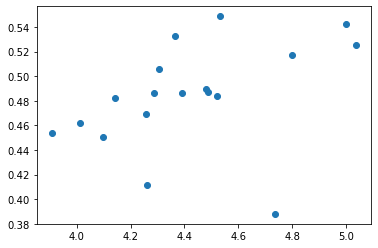

,value,EVI2017_1,EVI2017_2,EVI2017_3,EVI2017_4,EVI2017_5,EVI2017_6,EVI2017_7,EVI2017_8,EVI2017_9,EVI2017_10,EVI2017_11,EVI2017_12
value,1.000000,0.324091,0.414910,-0.273898,0.024289,0.044857,-0.129121,0.304009,0.370147,0.369955,-0.292204,-0.368450,0.283677
EVI2017_1,0.324091,1.000000,0.185595,0.000550,0.360019,0.096169,-0.727886,-0.264541,0.558106,-0.026146,-0.722482,-0.453459,0.688719
EVI2017_2,0.414910,0.185595,1.000000,0.063390,0.584168,0.534073,0.205742,0.014539,-0.117861,0.397069,0.192737,-0.477524,-0.308598
EVI2017_3,-0.273898,0.000550,0.063390,1.000000,0.560624,0.463557,0.255391,-0.333706,-0.296632,-0.477385,0.253791,0.368739,-0.189874
EVI2017_4,0.024289,0.360019,0.584168,0.560624,1.000000,0.531169,0.047840,-0.178564,-0.233769,-0.106794,0.159249,-0.206035,-0.177673
EVI2017_5,0.044857,0.096169,0.534073,0.463557,0.531169,1.000000,0.348205,-0.386381,0.002849,0.106948,0.178400,-0.091789,-0.403179
EVI2017_6,-0.129121,-0.727886,0.205742,0.255391,0.047840,0.348205,1.000000,0.121542,-0.752034,0.061447,0.698942,0.386972,-0.892386
EVI2017_7,0.304009,-0.264541,0.014539,-0.333706,-0.178564,-0.386381,0.121542,1.000000,-0.014124,-0.011959,0.222616,0.268455,-0.044774
EVI2017_8,0.370147,0.558106,-0.117861,-0.296632,-0.233769,0.002849,-0.752034,-0.014124,1.000000,0.128176,-0.641348,-0.292475,0.732965
EVI2017_9,0.369955,-0.026146,0.397069,-0.477385,-0.106794,0.106948,0.061447,-0.011959,0.128176,1.000000,0.123000,-0.546917,-0.097040


In [5]:
points = '/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/EVI_2017_intersected_monthly.gpkg'
points = gpd.read_file(points)
grouped = points.groupby(['Class','ADM3_EN']).mean().reset_index()
rfGRP = grouped.loc[(grouped['Class']=='Irrigated Rice')]

month = 'EVI2017_2'

dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_new.csv')


rfDO = dataOfficial.loc[(dataOfficial['ecosystem']=='irri') & (dataOfficial['year']==2017)]
merged = pd.merge(rfDO, rfGRP, left_on='muni', right_on='ADM3_EN')
merged



#rmse = sklearn.metrics.mean_squared_error(merged['value'], merged[month], squared=False)
#mae = sklearn.metrics.mean_absolute_error(merged['value'], merged[month])
#mape = sklearn.metrics.mean_absolute_percentage_error(merged['value'], merged[month])
#print('RMSE =', rmse, 'MAE =', mae, 'MAPE =', mape)

plt.scatter(merged['value'], merged[month])
plt.show()

df = pd.DataFrame(merged,columns=['value','EVI2017_1',	'EVI2017_2',	'EVI2017_3',	'EVI2017_4',	'EVI2017_5',	'EVI2017_6',	'EVI2017_7',	'EVI2017_8',	'EVI2017_9',	'EVI2017_10',	'EVI2017_11',	'EVI2017_12'])
df.corr()  

In [6]:
merged

,year,muni,ecosystem,param,value,Class,ADM3_EN,EVI2017_1,EVI2017_2,EVI2017_3,EVI2017_4,EVI2017_5,EVI2017_6,EVI2017_7,EVI2017_8,EVI2017_9,EVI2017_10,EVI2017_11,EVI2017_12
0,2017,Anilao,irri,yield,3.907283,Irrigated Rice,Anilao,0.718600,0.453600,0.539100,0.488100,0.488500,0.335100,0.454500,0.689500,0.371800,0.283000,0.468000,0.663200
1,2017,Banate,irri,yield,4.262090,Irrigated Rice,Banate,0.457500,0.411567,0.408817,0.370450,0.424100,0.526467,0.593783,0.636183,0.475667,0.353433,0.526417,0.555783
2,2017,Barotac Nuevo,irri,yield,4.307046,Irrigated Rice,Barotac Nuevo,0.615091,0.506041,0.386814,0.399655,0.404409,0.448605,0.626618,0.654327,0.529750,0.320155,0.425114,0.601555
3,2017,Barotac Viejo,irri,yield,4.013454,Irrigated Rice,Barotac Viejo,0.555367,0.461733,0.464138,0.461324,0.390210,0.469367,0.618424,0.589652,0.474343,0.460624,0.610605,0.540600
4,2017,Dingle,irri,yield,4.488426,Irrigated Rice,Dingle,0.638522,0.487456,0.479144,0.461356,0.505344,0.449711,0.624289,0.687111,0.514578,0.394444,0.498389,0.581722
5,2017,Dumangas,irri,yield,4.798616,Irrigated Rice,Dumangas,0.621584,0.517379,0.440932,0.441213,0.440545,0.405368,0.546274,0.671155,0.546274,0.341389,0.409789,0.617611
6,2017,Iloilo City,irri,yield,4.287319,Irrigated Rice,Iloilo City,0.542667,0.486150,0.453933,0.449317,0.424967,0.505733,0.515400,0.568483,0.535000,0.432017,0.387833,0.548733
7,2017,Janiuay,irri,yield,4.531330,Irrigated Rice,Janiuay,0.636700,0.548700,0.494800,0.501500,0.527400,0.581300,0.512400,0.568700,0.542800,0.396000,0.453500,0.486600
8,2017,Leganes,irri,yield,4.366748,Irrigated Rice,Leganes,0.627954,0.532246,0.443662,0.447446,0.453915,0.398131,0.532531,0.677662,0.632508,0.371192,0.330908,0.621015
9,2017,Mina,irri,yield,4.519240,Irrigated Rice,Mina,0.529917,0.484133,0.520883,0.454908,0.403733,0.501742,0.670075,0.590725,0.455617,0.430708,0.566333,0.581425


# RAINFED EVI

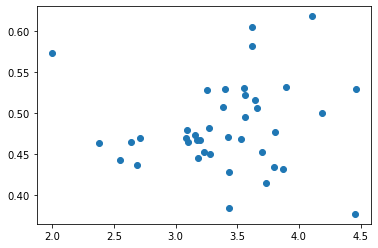

,value,EVI2017_1,EVI2017_2,EVI2017_3,EVI2017_4,EVI2017_5,EVI2017_6,EVI2017_7,EVI2017_8,EVI2017_9,EVI2017_10,EVI2017_11,EVI2017_12
value,1.000000,0.044506,-0.071667,0.072817,0.177162,-0.032623,-0.458807,-0.113244,0.010959,-0.332228,-0.437763,-0.281888,-0.046490
EVI2017_1,0.044506,1.000000,0.382051,0.178427,0.305202,0.338549,0.026864,0.211123,0.530646,0.167609,-0.091636,0.043175,0.507776
EVI2017_2,-0.071667,0.382051,1.000000,0.453991,0.414604,0.400831,0.449776,0.479829,0.339034,0.232752,0.487348,0.471583,0.207303
EVI2017_3,0.072817,0.178427,0.453991,1.000000,0.819020,0.841746,0.521225,0.540413,0.651218,0.416923,0.394559,0.484924,0.481098
EVI2017_4,0.177162,0.305202,0.414604,0.819020,1.000000,0.785305,0.403899,0.386380,0.566918,0.250987,0.222749,0.268514,0.361319
EVI2017_5,-0.032623,0.338549,0.400831,0.841746,0.785305,1.000000,0.659449,0.389175,0.737133,0.448969,0.458640,0.549889,0.500163
EVI2017_6,-0.458807,0.026864,0.449776,0.521225,0.403899,0.659449,1.000000,0.298558,0.427330,0.619989,0.828991,0.726357,0.186741
EVI2017_7,-0.113244,0.211123,0.479829,0.540413,0.386380,0.389175,0.298558,1.000000,0.446787,0.095553,0.368036,0.566914,0.413307
EVI2017_8,0.010959,0.530646,0.339034,0.651218,0.566918,0.737133,0.427330,0.446787,1.000000,0.543120,0.359150,0.428703,0.601972
EVI2017_9,-0.332228,0.167609,0.232752,0.416923,0.250987,0.448969,0.619989,0.095553,0.543120,1.000000,0.560122,0.444273,0.370018


In [39]:
points = '/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/EVI_2017_intersected_monthly.gpkg'
points = gpd.read_file(points)
grouped = points.groupby(['Class','ADM3_EN']).mean().reset_index()
rfGRP = grouped.loc[(grouped['Class']=='Rain-fed Rice')]

month = 'EVI2017_3'

dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_new.csv')


rfDO = dataOfficial.loc[(dataOfficial['ecosystem']=='rf') & (dataOfficial['year']==2017)]
merged = pd.merge(rfDO, rfGRP, left_on='muni', right_on='ADM3_EN')
merged


#rmse = sklearn.metrics.mean_squared_error(merged['value'], merged[month], squared=False)
#mae = sklearn.metrics.mean_absolute_error(merged['value'], merged[month])
#mape = sklearn.metrics.mean_absolute_percentage_error(merged['value'], merged[month])
#print('RMSE =', rmse, 'MAE =', mae, 'MAPE =', mape)

plt.scatter(merged['value'], merged[month])
plt.show()

df = pd.DataFrame(merged,columns=['value','EVI2017_1',	'EVI2017_2',	'EVI2017_3',	'EVI2017_4',	'EVI2017_5',	'EVI2017_6',	'EVI2017_7',	'EVI2017_8',	'EVI2017_9',	'EVI2017_10',	'EVI2017_11',	'EVI2017_12'])
df.corr()  

# IRRIGATED NDVI

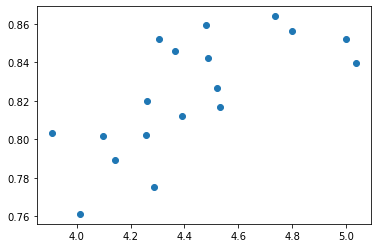

,value,EVI2017_1,EVI2017_2,EVI2017_3,EVI2017_4,EVI2017_5,EVI2017_6,EVI2017_7,EVI2017_8,EVI2017_9,EVI2017_10,EVI2017_11,EVI2017_12
value,1.000000,0.341154,0.131531,-0.343715,0.322241,-0.082118,-0.124621,0.289686,0.696698,0.428919,-0.318750,-0.306789,0.546937
EVI2017_1,0.341154,1.000000,0.471942,-0.261304,0.197538,0.320932,-0.609159,0.217029,0.405407,0.192721,-0.645242,-0.539331,0.568616
EVI2017_2,0.131531,0.471942,1.000000,0.058045,0.229258,0.270580,-0.096790,-0.076822,0.124964,0.120845,-0.194104,-0.672818,0.186439
EVI2017_3,-0.343715,-0.261304,0.058045,1.000000,0.461570,0.266762,0.346406,0.105505,-0.382015,-0.703033,0.207850,0.378932,-0.105217
EVI2017_4,0.322241,0.197538,0.229258,0.461570,1.000000,0.437110,0.245142,0.321453,0.055059,-0.085153,0.084348,0.102094,0.327245
EVI2017_5,-0.082118,0.320932,0.270580,0.266762,0.437110,1.000000,-0.015185,-0.002804,-0.095426,-0.189851,-0.034660,0.192813,0.058432
EVI2017_6,-0.124621,-0.609159,-0.096790,0.346406,0.245142,-0.015185,1.000000,0.070008,-0.339489,-0.239039,0.704560,0.383698,-0.516152
EVI2017_7,0.289686,0.217029,-0.076822,0.105505,0.321453,-0.002804,0.070008,1.000000,0.509679,-0.381579,-0.172409,0.333714,0.533608
EVI2017_8,0.696698,0.405407,0.124964,-0.382015,0.055059,-0.095426,-0.339489,0.509679,1.000000,0.336677,-0.599108,-0.235766,0.775612
EVI2017_9,0.428919,0.192721,0.120845,-0.703033,-0.085153,-0.189851,-0.239039,-0.381579,0.336677,1.000000,-0.238479,-0.590741,0.227004


In [7]:
points = '/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/NDVI_2017_intersected_monthly.gpkg'
points = gpd.read_file(points)
grouped = points.groupby(['Class','ADM3_EN']).mean().reset_index()
rfGRP = grouped.loc[(grouped['Class']=='Irrigated Rice')]

month = 'EVI2017_8'

dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_new.csv')


rfDO = dataOfficial.loc[(dataOfficial['ecosystem']=='irri') & (dataOfficial['year']==2017)]
merged = pd.merge(rfDO, rfGRP, left_on='muni', right_on='ADM3_EN')
merged



#rmse = sklearn.metrics.mean_squared_error(merged['value'], merged[month], squared=False)
#mae = sklearn.metrics.mean_absolute_error(merged['value'], merged[month])
#mape = sklearn.metrics.mean_absolute_percentage_error(merged['value'], merged[month])
#print('RMSE =', rmse, 'MAE =', mae, 'MAPE =', mape)

plt.scatter(merged['value'], merged[month])
plt.show()

df = pd.DataFrame(merged,columns=['value','EVI2017_1',	'EVI2017_2',	'EVI2017_3',	'EVI2017_4',	'EVI2017_5',	'EVI2017_6',	'EVI2017_7',	'EVI2017_8',	'EVI2017_9',	'EVI2017_10',	'EVI2017_11',	'EVI2017_12'])
df.corr()  

In [ ]:
merged[[]]

# RAINFED NDVI

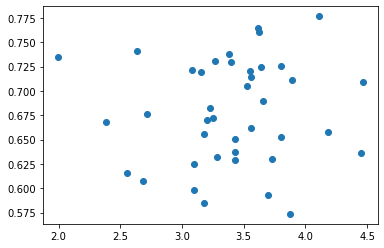

,value,EVI2017_1,EVI2017_2,EVI2017_3,EVI2017_4,EVI2017_5,EVI2017_6,EVI2017_7,EVI2017_8,EVI2017_9,EVI2017_10,EVI2017_11,EVI2017_12
value,1.000000,-0.049900,-0.285772,0.061877,0.110969,-0.172256,-0.381472,0.094726,0.163113,-0.061985,-0.348974,-0.134317,0.163496
EVI2017_1,-0.049900,1.000000,0.535711,0.333276,0.376691,0.452099,0.239022,0.403855,0.523765,0.382368,-0.016634,0.344073,0.535706
EVI2017_2,-0.285772,0.535711,1.000000,0.505290,0.501881,0.550841,0.699586,0.411268,0.250031,0.165240,0.586116,0.449513,0.238356
EVI2017_3,0.061877,0.333276,0.505290,1.000000,0.870311,0.746193,0.494482,0.401093,0.452163,0.231088,0.365869,0.472065,0.409649
EVI2017_4,0.110969,0.376691,0.501881,0.870311,1.000000,0.774632,0.448619,0.518967,0.539981,0.217373,0.278306,0.493027,0.534204
EVI2017_5,-0.172256,0.452099,0.550841,0.746193,0.774632,1.000000,0.640594,0.221493,0.458165,0.497029,0.408405,0.653725,0.410588
EVI2017_6,-0.381472,0.239022,0.699586,0.494482,0.448619,0.640594,1.000000,0.154376,0.226178,0.212601,0.835649,0.727125,0.065387
EVI2017_7,0.094726,0.403855,0.411268,0.401093,0.518967,0.221493,0.154376,1.000000,0.592300,0.045629,0.044810,0.248485,0.445274
EVI2017_8,0.163113,0.523765,0.250031,0.452163,0.539981,0.458165,0.226178,0.592300,1.000000,0.328322,0.000793,0.386051,0.508590
EVI2017_9,-0.061985,0.382368,0.165240,0.231088,0.217373,0.497029,0.212601,0.045629,0.328322,1.000000,0.109442,0.272067,0.226186


In [41]:
points = '/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/NDVI_2017_intersected_monthly.gpkg'
points = gpd.read_file(points)
grouped = points.groupby(['Class','ADM3_EN']).mean().reset_index()
rfGRP = grouped.loc[(grouped['Class']=='Rain-fed Rice')]

month = 'EVI2017_3'

dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_new.csv')


rfDO = dataOfficial.loc[(dataOfficial['ecosystem']=='rf') & (dataOfficial['year']==2017)]
merged = pd.merge(rfDO, rfGRP, left_on='muni', right_on='ADM3_EN')
merged


#rmse = sklearn.metrics.mean_squared_error(merged['value'], merged[month], squared=False)
#mae = sklearn.metrics.mean_absolute_error(merged['value'], merged[month])
#mape = sklearn.metrics.mean_absolute_percentage_error(merged['value'], merged[month])
#print('RMSE =', rmse, 'MAE =', mae, 'MAPE =', mape)

plt.scatter(merged['value'], merged[month])
plt.show()

df = pd.DataFrame(merged,columns=['value','EVI2017_1',	'EVI2017_2',	'EVI2017_3',	'EVI2017_4',	'EVI2017_5',	'EVI2017_6',	'EVI2017_7',	'EVI2017_8',	'EVI2017_9',	'EVI2017_10',	'EVI2017_11',	'EVI2017_12'])
df.corr()  

# RAINFED ADJUSTED FOR BETTER MUNICIPALITIES

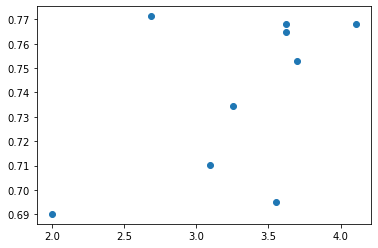

,value,EVI2017_1,EVI2017_2,EVI2017_3,EVI2017_4,EVI2017_5,EVI2017_6,EVI2017_7,EVI2017_8,EVI2017_9,EVI2017_10,EVI2017_11,EVI2017_12
value,1.000000,-0.136799,0.066911,0.250328,0.173985,0.097366,0.342258,0.100800,0.012365,0.376896,0.512074,0.397270,-0.572453
EVI2017_1,-0.136799,1.000000,0.648127,0.636714,0.640663,0.700483,0.070537,0.593841,0.586895,0.699944,-0.258384,0.410145,0.495720
EVI2017_2,0.066911,0.648127,1.000000,0.538409,0.470317,0.653360,0.396442,0.466709,0.389159,0.534094,0.106331,0.069891,0.379922
EVI2017_3,0.250328,0.636714,0.538409,1.000000,0.990491,0.943571,0.652583,0.718083,0.935949,0.825736,0.047404,0.698555,0.456283
EVI2017_4,0.173985,0.640663,0.470317,0.990491,1.000000,0.933722,0.590929,0.728568,0.971036,0.829403,-0.071249,0.681171,0.517781
EVI2017_5,0.097366,0.700483,0.653360,0.943571,0.933722,1.000000,0.633047,0.585005,0.885345,0.816100,-0.038356,0.574666,0.603841
EVI2017_6,0.342258,0.070537,0.396442,0.652583,0.590929,0.633047,1.000000,0.087648,0.545969,0.312518,0.512238,0.469761,0.187159
EVI2017_7,0.100800,0.593841,0.466709,0.718083,0.728568,0.585005,0.087648,1.000000,0.692123,0.654411,-0.149283,0.399351,0.310806
EVI2017_8,0.012365,0.586895,0.389159,0.935949,0.971036,0.885345,0.545969,0.692123,1.000000,0.755259,-0.231911,0.589833,0.642423
EVI2017_9,0.376896,0.699944,0.534094,0.825736,0.829403,0.816100,0.312518,0.654411,0.755259,1.000000,-0.241102,0.463504,0.305746


In [43]:
points = '/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/NDVI_2017_intersected_monthly.gpkg'
points = gpd.read_file(points)
grouped = points.groupby(['Class','ADM3_EN']).mean().reset_index()
pregrp = grouped.loc[grouped['Class']=='Rain-fed Rice']
'''rfGRP = pregrp.loc[pregrp['ADM3_EN'].isin(['Iloilo City' ,
'San Joaquin',
'Miagao',
'Igbaras',
'Tubungan',
'Guimbal',
'Tigbauan', 
'Oton' ,
'Barotac Viejo',
'San Rafael',
'Sara',
'Ajuy',
'Lemery',
'San Dionisio',
'Concepcion',
'Balasan',
'Batad' ,
'Estancia',
'Carles',

])]'''

'''rfGRP = pregrp.loc[pregrp['ADM3_EN'].isin([
'Lambunao',
'Passi City',
'Calinog',
'Santa Barbara',
'Cabatuan',
#'Sara',
'Balasan',
'Dueñas',
'Leon',
#'Janiuay'
])]'''

rfGRP = pregrp.loc[pregrp['ADM3_EN'].isin([
'Carles',
'Calinog',
'Estancia',
'Lambunao',
'Cabatuan',
'Duenas',
'Santa Barbara',
'Bingawan',
'Maasin',
'Badiangan'
])]

month = 'EVI2017_10'

dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_new.csv')


rfDO = dataOfficial.loc[(dataOfficial['ecosystem']=='rf') & (dataOfficial['year']==2017)]
merged = pd.merge(rfDO, rfGRP, left_on='muni', right_on='ADM3_EN')
merged


#rmse = sklearn.metrics.mean_squared_error(merged['value'], merged[month], squared=False)
#mae = sklearn.metrics.mean_absolute_error(merged['value'], merged[month])
#mape = sklearn.metrics.mean_absolute_percentage_error(merged['value'], merged[month])
#print('RMSE =', rmse, 'MAE =', mae, 'MAPE =', mape)

plt.scatter(merged['value'], merged[month])
plt.show()

df = pd.DataFrame(merged,columns=['value','EVI2017_1',	'EVI2017_2',	'EVI2017_3',	'EVI2017_4',	'EVI2017_5',	'EVI2017_6',	'EVI2017_7',	'EVI2017_8',	'EVI2017_9',	'EVI2017_10',	'EVI2017_11',	'EVI2017_12'])
df.corr()  

In [ ]:
District I
'Iloilo City' ,
'San Joaquin',
'Miagao',
'Igbaras',
'Tubungan',
'Guimbal',
'Tigbauan', 
'Oton' ,

District II
'Leon' ,
'Alimodian',
'San Miguel',
'Santa Barbara',
'Pavia',
'Leganes',
'Zarraga',
'New Lucena',

District III
'Cabatuan',
'Maasin',
'Pototan',
'Mina',
'Janiuay',
'Badiangan', 
'Lambunao',
'Calinog',
'Bingawan', 

District IV
'Passi City',
'San Enrique', 
'Dingle',
'Duenas',
'Dumangas',
'Barotac Nuevo',
'Anilao',
'Banate' ,

District V
'Barotac Viejo',
'San Rafael',
'Sara',
'Ajuy',
'Lemery',
'San Dionisio',
'Concepcion',
'Balasan',
'Batad' ,
'Estancia',
'Carles',


TOP MUNIS RAINFED
'Lambunao',
'Passi City',
'Calinog',
'Santa Barbara',
'Cabatuan',
'Sara',
'Balasan',
'Dueñas',
'Leon',
'Janiuay'

## MISC CODES

In [ ]:
rstats = rs.zonal_stats('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/intersect_DS_points.gpkg', 
                        eviPath, 
                        stats='mean', 
                        band=1,
                        geojson_out=True)
rstats = gpd.GeoDataFrame.from_features(rstats)


grouped = rstats.groupby(['Class','ADM3_EN']).mean().reset_index()

dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_2017.csv')


rfGRP = grouped.loc[grouped['Class']=='Rain-fed Rice']
rfDO = dataOfficial.loc[dataOfficial['ecosystem']=='rf']
merged = pd.merge(rfDO, rfGRP, left_on='muni', right_on='ADM3_EN')

from sklearn.metrics import mean_squared_error

rmse = sklearn.metrics.mean_squared_error(merged['value'], merged['mean'], squared=False)
mae = sklearn.metrics.mean_absolute_error(merged['value'], merged['mean'])
mape = sklearn.metrics.mean_absolute_percentage_error(merged['value'], merged['mean'])


print('RMSE =', rmse, 'MAE =', mae, 'MAPE =', mape)
plt.scatter(merged['value'], merged['mean'])
plt.show()

In [ ]:

rstats = rs.zonal_stats('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/intersect_DS_points.gpkg', 
                        eviPath, 
                        stats='mean', 
                        band=2,
                        geojson_out=True)
rstats = gpd.GeoDataFrame.from_features(rstats)


grouped = rstats.groupby(['Class','ADM3_EN']).mean().reset_index()

dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_2017.csv')


rfGRP = grouped.loc[grouped['Class']=='Rain-fed Rice']
rfDO = dataOfficial.loc[dataOfficial['ecosystem']=='rf']
merged = pd.merge(rfDO, rfGRP, left_on='muni', right_on='ADM3_EN')


rmse = sklearn.metrics.mean_squared_error(merged['value'], merged['mean'], squared=False)
mae = sklearn.metrics.mean_absolute_error(merged['value'], merged['mean'])
mape = sklearn.metrics.mean_absolute_percentage_error(merged['value'], merged['mean'])


print('RMSE =', rmse, 'MAE =', mae, 'MAPE =', mape)
plt.scatter(merged['value'], merged['mean'])
plt.show()

In [ ]:

rstats = rs.zonal_stats('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/intersect_DS_points.gpkg', 
                        eviPath, 
                        stats='mean', 
                        band=3,
                        geojson_out=True)
rstats = gpd.GeoDataFrame.from_features(rstats)


grouped = rstats.groupby(['Class','ADM3_EN']).mean().reset_index()

dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_2017.csv')


rfGRP = grouped.loc[grouped['Class']=='Rain-fed Rice']
rfDO = dataOfficial.loc[dataOfficial['ecosystem']=='rf']
merged = pd.merge(rfDO, rfGRP, left_on='muni', right_on='ADM3_EN')


rmse = sklearn.metrics.mean_squared_error(merged['value'], merged['mean'], squared=False)
mae = sklearn.metrics.mean_absolute_error(merged['value'], merged['mean'])
mape = sklearn.metrics.mean_absolute_percentage_error(merged['value'], merged['mean'])


print('RMSE =', rmse, 'MAE =', mae, 'MAPE =', mape)
plt.scatter(merged['value'], merged['mean'])
plt.show()

In [ ]:
sns.pairplot(cormap);
